In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

In [2]:
# %matplotlib
# %matplotlib

In [3]:
dossier_mad_stat = '2.MAD Statique/'
labels = np.genfromtxt(dossier_mad_stat + f'/data_MS_90anches.txt', delimiter='', dtype=str)[0,:]
# print(labels)
data = np.genfromtxt(dossier_mad_stat + f'/data_MS_90anches.txt', delimiter='', skip_header=1)
# X = data[:,1:]
data = data[:,1:]
# print(X)

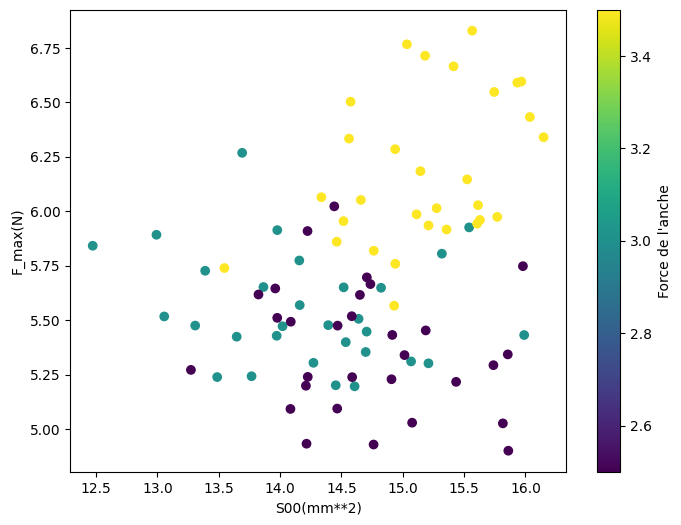

In [4]:
# Scatter 

x = 1
y = 2

plt.close('all')
plt.figure(num='Scatter', figsize=(8,6))
plt.scatter(data[:,x], data[:,y], c=data[:, 0], cmap='viridis')
plt.xlabel(f'{labels[x+1]}')
plt.ylabel(f'{labels[y+1]}')
plt.colorbar(location='right', label='Force de l\'anche')

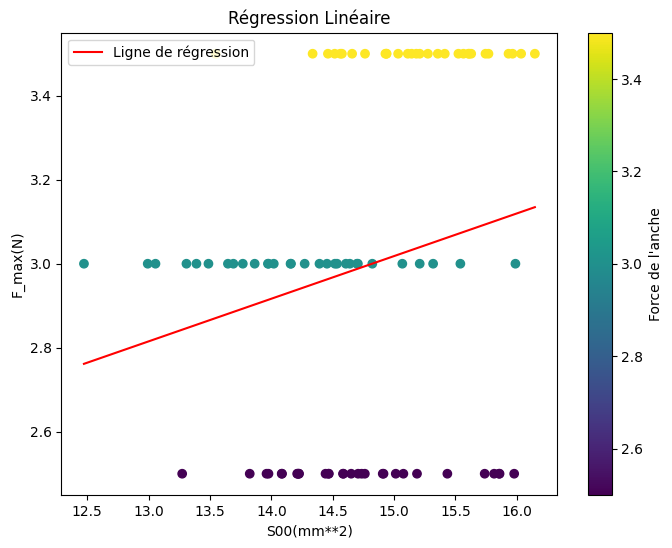

In [5]:
# linear regression

feature = 1
target = 0

x_train, x_test, y_train, y_test = train_test_split(data[:,feature].reshape(-1, 1), data[:,target], test_size=0.2, random_state=42)
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train)
y_pred = linear_reg_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

x_range = np.linspace(min(data[:,feature]), max(data[:,feature]), 100).reshape(-1, 1)  # Plage de valeurs pour la ligne
y_range_pred = linear_reg_model.predict(x_range)  # Prédictions pour ces valeurs

plt.close('all')
plt.figure(num='linear regression', figsize=(8,6))
plt.scatter(data[:,feature], data[:,target], c=data[:,0], cmap='viridis')
plt.plot(x_range, y_range_pred, color='red', label='Ligne de régression')
plt.xlabel(f'{labels[x+1]}')
plt.ylabel(f'{labels[y+1]}')
plt.colorbar(location='right', label='Force de l\'anche')
plt.title('Régression Linéaire')
plt.legend()

# Afficher le graphique
plt.show()

[[ 2.83333333 13.77281324  5.53256275  0.40235112  2.31487829  1.26920629]
 [ 3.46774194 15.25166011  6.17667607  0.40519771  2.80513984  1.74797191]
 [ 2.6875     14.96334948  5.38056343  0.3601152   2.3851493   1.38187093]]


40.6920435149215

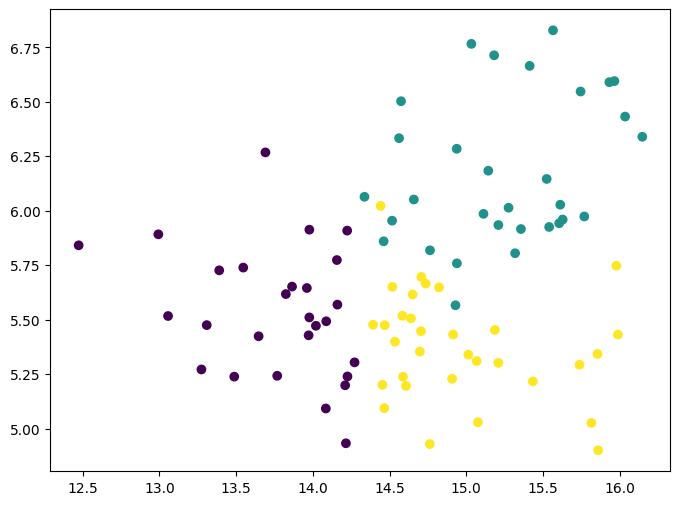

In [6]:
# Clustering

x=1
y=2

model = KMeans(n_clusters=3)    #, n_init=10, max_iter=300)
model.fit(data)
# model.labels_
model.predict(data)
model.cluster_centers_ 
print(model.cluster_centers_)
plt.close('all')
plt.figure(num='CLustering', figsize=(8,6))
plt.scatter(data[:,x], data[:,y], c=model.predict(data))
# plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c="r")
model.inertia_ # fonction de coût

[[-0.25234711 -0.85266601 -0.30144302  0.00290892 -0.21039117 -0.2722881 ]
 [-0.54320249  0.49345956 -0.60393407 -0.0537615  -0.24368663 -0.18552325]]
[0.63892006 0.26438378]


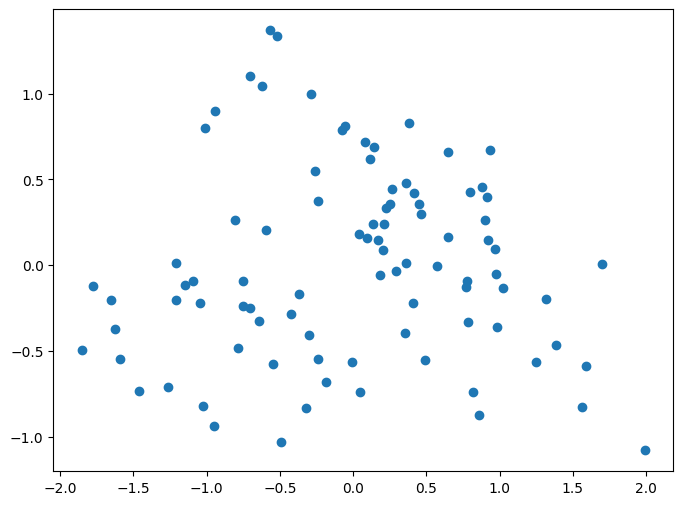

In [7]:
# PCA - réduction de dimensions

scaler = StandardScaler()
X_centered_reduced = scaler.fit_transform(data) # centrer et réduire les données du set

model_PCA = PCA(n_components=2)
X_reduced = model_PCA.fit_transform(data)

plt.close('all')
plt.figure(num='PCA', figsize=(8,6))
plt.scatter(X_reduced[:,0], X_reduced[:,1])

print(model_PCA.components_)
print(model_PCA.explained_variance_ratio_)

# pour savoir quelle dimension donner à notre modèle, on peut étudier l'évolution de la variance. Il ne faut pas une vairance inférieure à 95%-99%
# plt.plot(np.cumsum(model_PCA.explained_variance_ratio_))

## Matrices de Correlation, Covariance, Similarité
[Correlation](https://numpy.org/doc/2.0/reference/generated/numpy.corrcoef.html) :  
$$
R_{ij} = \frac{C_{ij}}{\sqrt{C_{ii} C_{jj}}}
$$
[Covariance](https://numpy.org/doc/2.0/reference/generated/numpy.cov.html) : 
$$
\text{Cov}(X,Y) = \frac{1}{N} \sum_{i=1}^{N} (X_i - \bar{X})(Y_i - \bar{Y})
$$
[Cosine Similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html) : 
$$
K(X, Y) = \frac{\langle X, Y \rangle}{\|X\| \cdot \|Y\|}
$$


In [8]:
data_transpos = data.T
correlation_matrix = np.corrcoef(data_transpos)
covariance_matrix = np.cov(data_transpos)
similarity_matrix = cosine_similarity(data_transpos)
# similarity_df = pd.DataFrame(similarity_matrix, index=data.index, columns=data.index)



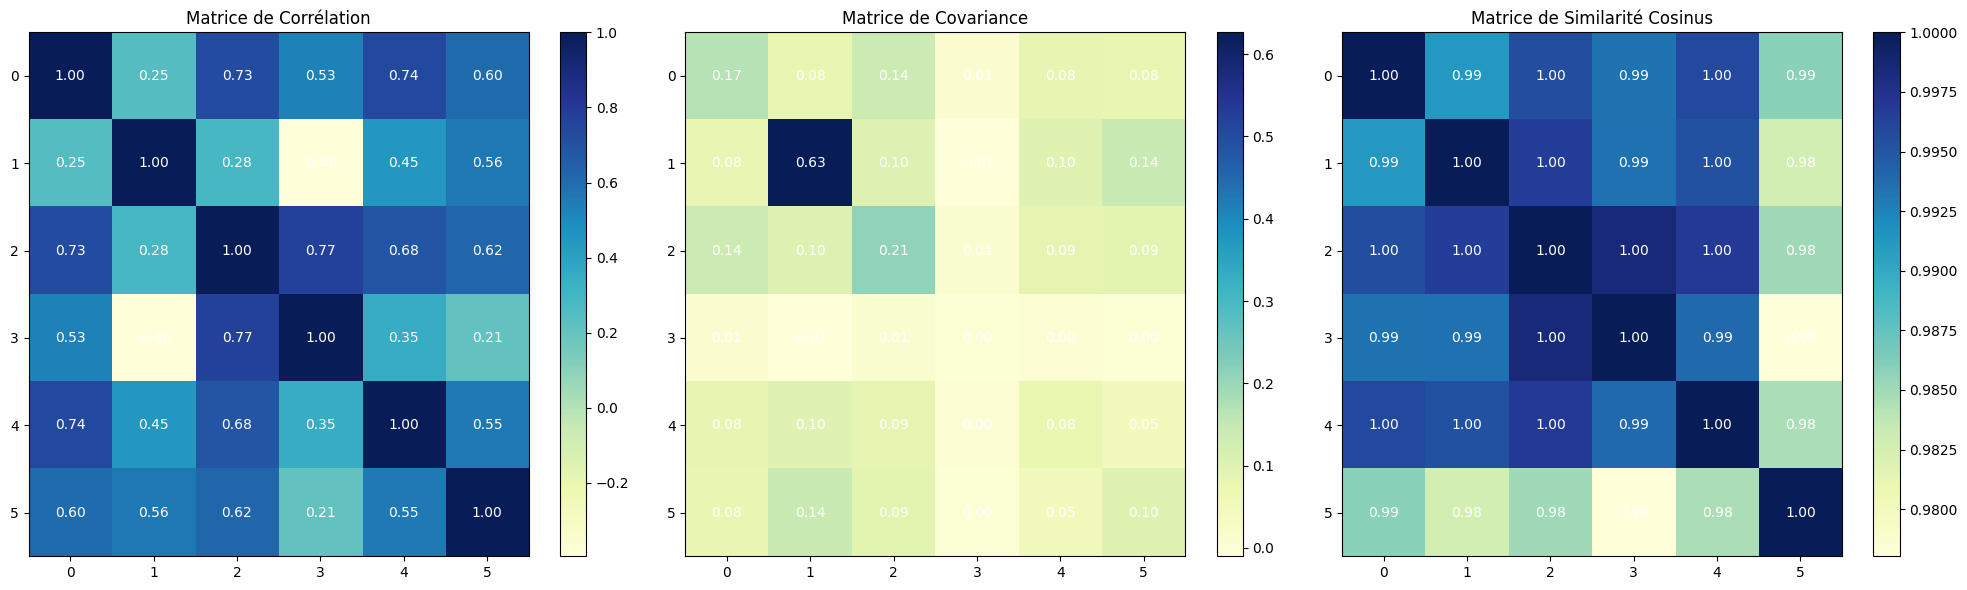

In [9]:
plt.close('all')

# fig, axs = plt.subplots(1, 3, figsize=(14, 4.2))
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

def plot_anotation(matrix, num_axs):
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            axs[num_axs].text(j, i, f'{matrix[i, j]:.2f}', ha='center', va='center', color='white')

# Matrice de corrélation avec imshow
im1 = axs[0].imshow(correlation_matrix, cmap='YlGnBu', aspect='auto')
plot_anotation(correlation_matrix, 0)
axs[0].set_title('Matrice de Corrélation')
fig.colorbar(im1, ax=axs[0])  # Ajouter une barre de couleur pour l'échelle

# Matrice de covariance avec imshow
im2 = axs[1].imshow(covariance_matrix, cmap='YlGnBu', aspect='auto')
plot_anotation(covariance_matrix, 1)
axs[1].set_title('Matrice de Covariance')
fig.colorbar(im2, ax=axs[1])  # Ajouter une barre de couleur pour l'échelle

# Matrice de similarité cosinus avec imshow
im3 = axs[2].imshow(similarity_matrix, cmap='YlGnBu', aspect='auto')
plot_anotation(similarity_matrix, 2)
axs[2].set_title('Matrice de Similarité Cosinus')
fig.colorbar(im3, ax=axs[2])  # Ajouter une barre de couleur pour l'échelle

plt.tight_layout()
plt.show()